# Capstone 2 Exploratory Data Analysis

In [1]:
#load python packages
import os
import pandas as pd
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
os.getcwd()

'/Users/denainqui/Google Drive/Springboard/Data Science Course/11 - Python Statistics in EDA/11.5 Capstone Two - EDA'

In [5]:
# Load the data. 
data = pd.read_csv('Alternative_Schools.csv')

In [6]:
data.head()

,LEAID,NAME,CITY,STATE,MEMBER_alt,revised,hasReassignedSchools,altRatio_99,altRatio,altRatio_growth,...,pdiff_puptch,TEACH_FYSY_RATIO_reg,TEACH_FYSY_RATIO_alt,pdiff_TEACH_FYSY_RATIO,TEACH_ABSENT_RATIO_reg,TEACH_ABSENT_RATIO_alt,pdiff_TEACH_ABSENT_RATIO,gradRate_reg,gradRate_alt,ppdiff_gradRate
0,100390,BIRMINGHAM CITY,BIRMINGHAM,AL,20,False,False,0.005357,0.002079,-0.003279,...,NaN,0.103709,0.000000,-1.000000,0.068522,0.400000,4.837514,79.659940,NaN,NaN
1,101380,ETOWAH COUNTY,GADSDEN,AL,173,False,False,0.000000,0.036034,0.036034,...,2.501920,0.058720,0.000000,-1.000000,0.407369,0.000000,-1.000000,87.882852,17.0,-70.882852
2,101620,GADSDEN CITY,GADSDEN,AL,9,False,False,0.010977,0.003270,-0.007706,...,NaN,0.159057,NaN,NaN,0.511340,NaN,NaN,73.000000,NaN,NaN
3,102310,MARION COUNTY,HAMILTON,AL,4,False,False,0.002670,0.002119,-0.000551,...,-0.878292,0.040213,0.000000,-1.000000,0.150799,0.000000,-1.000000,77.000000,NaN,NaN
4,102370,MOBILE COUNTY,MOBILE,AL,205,False,False,0.005539,0.006816,0.001278,...,-0.883871,0.125812,0.117647,-0.064899,0.180154,0.235294,0.306075,83.275161,NaN,NaN


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1923 entries, 0 to 1922
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   LEAID                     1923 non-null   int64  
 1   NAME                      1923 non-null   object 
 2   CITY                      1923 non-null   object 
 3   STATE                     1923 non-null   object 
 4   MEMBER_alt                1923 non-null   int64  
 5   revised                   1923 non-null   bool   
 6   hasReassignedSchools      1923 non-null   bool   
 7   altRatio_99               1890 non-null   float64
 8   altRatio                  1913 non-null   float64
 9   altRatio_growth           1890 non-null   float64
 10  pupMONEY_reg              1766 non-null   float64
 11  pupMONEY_alt              1807 non-null   float64
 12  pdiff_pupMONEY            1683 non-null   float64
 13  hasCounc_reg              1767 non-null   float64
 14  hasCounc

## Data Profiles - Plots and Tables

In [8]:
#summary stats table
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
LEAID,1923.0,2.691361e+06,1.742515e+06,100390.000000,691051.500000,2.617160e+06,4.813080e+06,5.605830e+06
MEMBER_alt,1923.0,2.284477e+02,5.667157e+02,1.000000,29.000000,8.300000e+01,2.050000e+02,1.330600e+04
altRatio_99,1890.0,7.585371e-02,2.023522e-01,0.000000,0.000000,1.624017e-02,4.602621e-02,1.000000e+00
altRatio,1913.0,1.062797e-01,2.207202e-01,0.000067,0.015845,3.323837e-02,6.821963e-02,1.000000e+00
altRatio_growth,1890.0,2.465111e-02,1.160058e-01,-0.992968,-0.005122,7.715011e-03,3.121400e-02,1.000000e+00
pupMONEY_reg,1766.0,5.717296e+03,8.625727e+03,0.000000,3753.509148,4.413924e+03,5.645574e+03,1.918807e+05
pupMONEY_alt,1807.0,1.035522e+04,2.503234e+04,0.000000,4172.174095,6.620253e+03,1.027306e+04,6.290013e+05
pdiff_pupMONEY,1683.0,1.206490e+00,5.472421e+00,-1.000000,-0.102080,4.041914e-01,1.181835e+00,1.199651e+02
hasCounc_reg,1767.0,8.775815e-01,2.435352e-01,0.000000,0.875000,1.000000e+00,1.000000e+00,1.000000e+00
hasCounc_alt,1822.0,4.756922e-01,4.565517e-01,0.000000,0.000000,5.000000e-01,1.000000e+00,1.000000e+00


TypeError: numpy boolean subtract, the `-` operator, is not supported, use the bitwise_xor, the `^` operator, or the logical_xor function instead.

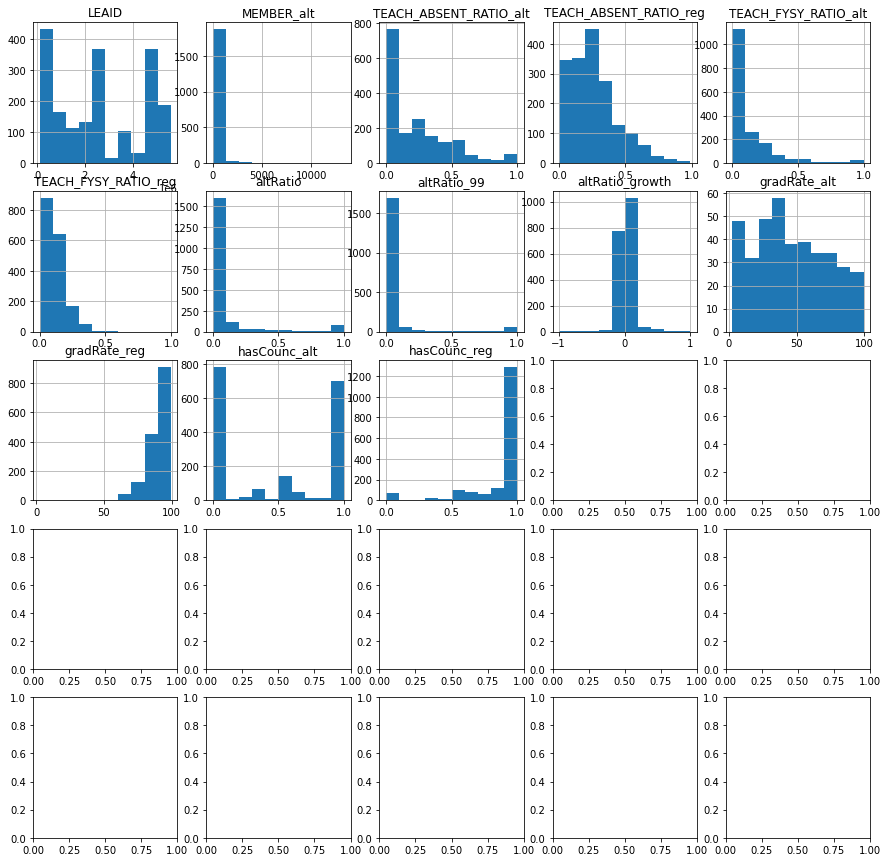

In [23]:
#histograms for each variable in df
hist = data.hist(bins=10,figsize =(15,15))

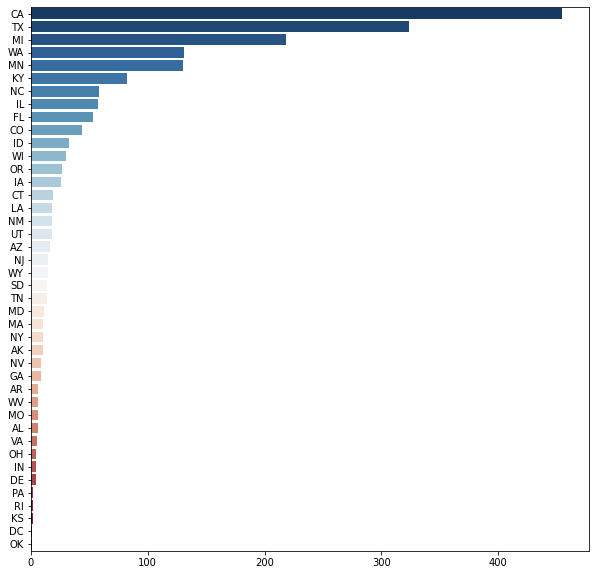

In [16]:
#State levels plot
f, ax = plt.subplots(figsize=(10, 10))
x = pd.DataFrame(data.STATE.value_counts())
names = list(x.index)
values = list(x.STATE)
sns.barplot(x=values, y=names, palette="RdBu_r")

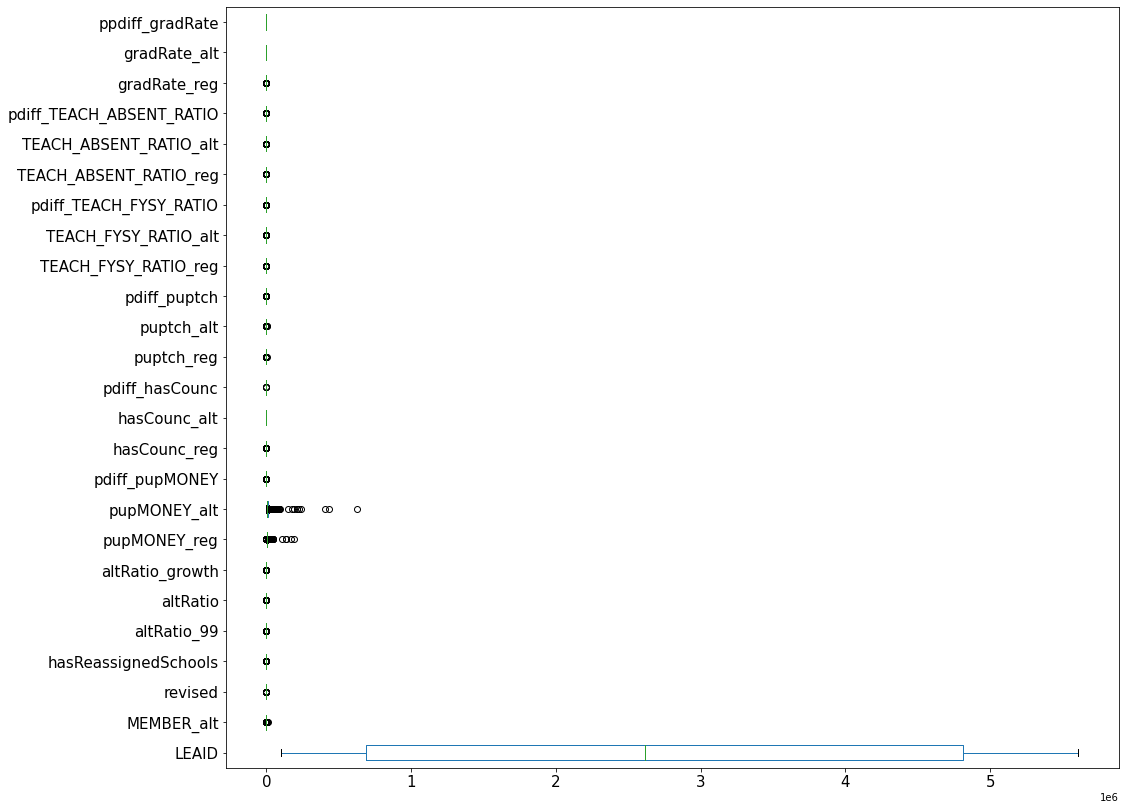

In [17]:
#boxplots for each column
data.boxplot(grid=False, vert=False, figsize=(16, 14), fontsize=15)

## Data Relationships

In [18]:
#correlations between variables 
data.corr()

,LEAID,MEMBER_alt,revised,hasReassignedSchools,altRatio_99,altRatio,altRatio_growth,pupMONEY_reg,pupMONEY_alt,pdiff_pupMONEY,...,pdiff_puptch,TEACH_FYSY_RATIO_reg,TEACH_FYSY_RATIO_alt,pdiff_TEACH_FYSY_RATIO,TEACH_ABSENT_RATIO_reg,TEACH_ABSENT_RATIO_alt,pdiff_TEACH_ABSENT_RATIO,gradRate_reg,gradRate_alt,ppdiff_gradRate
LEAID,1.000000,-0.068264,-0.097479,0.130330,-0.209488,-0.138037,0.110145,-0.023175,0.036925,0.044754,...,-0.004067,0.012496,0.044328,0.039360,-0.034379,-0.008773,0.008191,-0.015395,0.095969,0.085194
MEMBER_alt,-0.068264,1.000000,0.210668,0.183455,0.016807,0.105106,0.182827,0.012553,-0.054863,-0.044677,...,0.012492,0.057226,0.048139,0.014757,0.045875,0.070891,0.142901,-0.168559,-0.042447,-0.028101
revised,-0.097479,0.210668,1.000000,-0.021666,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
hasReassignedSchools,0.130330,0.183455,-0.021666,1.000000,-0.138075,-0.125561,0.027175,-0.007604,-0.032315,-0.029658,...,0.046565,0.115890,0.125103,0.042232,-0.006038,0.046523,0.076647,-0.159303,0.063331,0.112954
altRatio_99,-0.209488,0.016807,NaN,-0.138075,1.000000,0.843179,-0.211488,0.026685,-0.019217,-0.048185,...,0.001002,0.013653,0.036321,-0.011896,-0.029519,-0.069514,0.007053,-0.110687,-0.036751,0.107011
altRatio,-0.138037,0.105106,NaN,-0.125561,0.843179,1.000000,0.347150,0.086592,-0.029403,-0.080826,...,0.055180,-0.034175,0.039256,0.025405,-0.046095,-0.089526,0.087694,-0.114724,-0.001605,-0.085537
altRatio_growth,0.110145,0.182827,NaN,0.027175,-0.211488,0.347150,1.000000,0.057495,-0.019410,-0.040125,...,0.050323,-0.045073,0.017356,0.034801,-0.014443,-0.044541,0.076317,-0.024554,0.027873,-0.128992
pupMONEY_reg,-0.023175,0.012553,NaN,-0.007604,0.026685,0.086592,0.057495,1.000000,0.019556,-0.045265,...,0.004522,0.014459,-0.009024,-0.020456,-0.032268,0.066400,0.048832,0.002778,-0.068191,-0.030854
pupMONEY_alt,0.036925,-0.054863,NaN,-0.032315,-0.019217,-0.029403,-0.019410,0.019556,1.000000,0.932810,...,-0.058855,-0.034386,-0.016285,-0.016144,-0.001857,0.030293,-0.003162,0.028538,0.014636,0.023245
pdiff_pupMONEY,0.044754,-0.044677,NaN,-0.029658,-0.048185,-0.080826,-0.040125,-0.045265,0.932810,1.000000,...,-0.062160,-0.028543,-0.012808,-0.011377,0.012340,0.016104,0.009476,0.017233,-0.022914,-0.039397


In [20]:
# Make a pairplot of the data
#sns.pairplot(data)

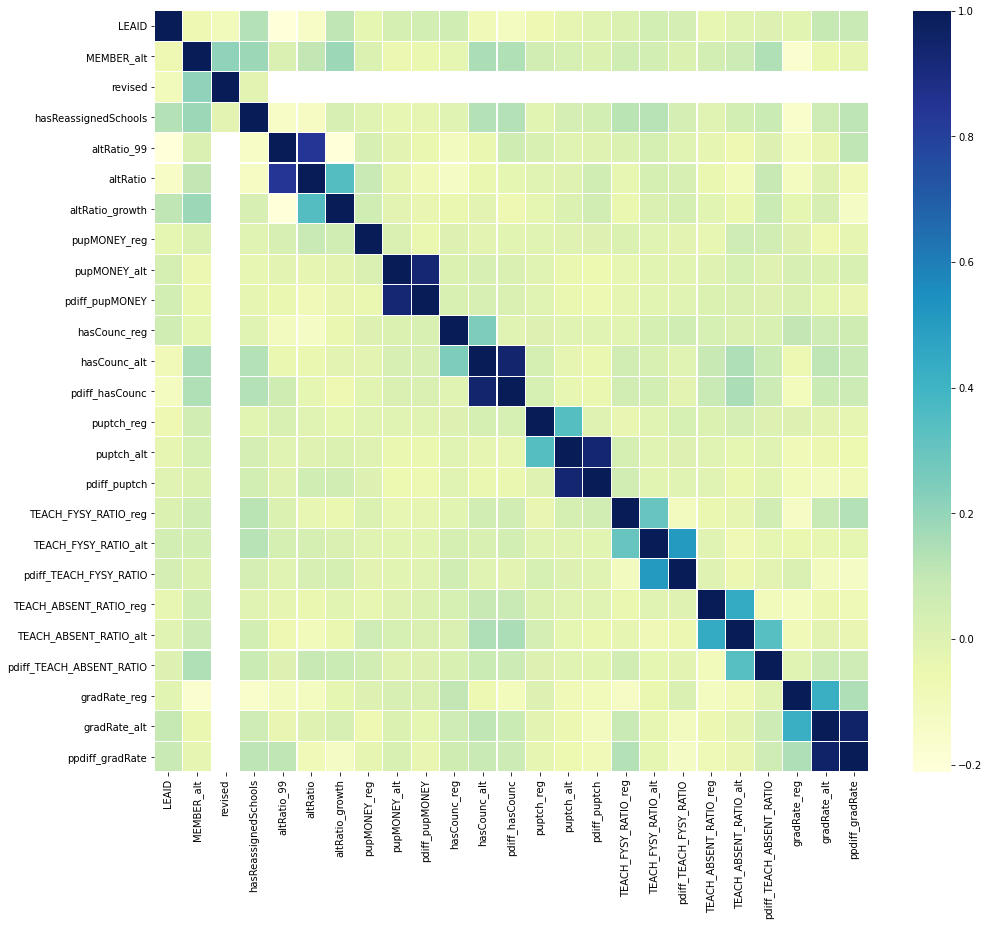

In [39]:
# Create a correlation matrix heatmap
plt.figure(figsize=(16,14))
sns.heatmap(data.corr(),linewidths=.1,cmap="YlGnBu")

## Identifying and Creating Features